<a href="https://colab.research.google.com/github/4deepprk/4deepprk.github.io/blob/master/DL_103_Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

# 2D Plotting of sigmoid function for 1 dimensional data (1 feature)
# and 1 dimensional target variable 
$S_{w, b}(x) = \frac{1}{1 + e^{-(w.x + b)}}$

In [0]:
def sigmoid(x, w, b):
  # Sigmoid function takes in x, w and b as scalars
  return 1 / (1 + np.exp(-(w*x + b)))

In [0]:
# Value of sigmoid function ranges from 0 to 1
sigmoid(1, 0.5, 0)

0.6224593312018546

In [0]:
# Plot sigmoid function for different values of w and b
''' # google colab slider helps in sliding the value of w and b'''
w = -1.5 #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0.3 #@param {type: "slider", min: -2, max: 2, step: 0.1}
# 100 points equally spaced between -10 and 10
# let us see how graph of sigmoid looks like
X = np.linspace(-10, 10, 100)
# w and b are scalars and X is a 1D array
# Python Broadcasting : 
# w.x -> dot product of scalar and vector is a vector
# w.x + b -> vector + scalar is a  vector
# 1 / (1 + np.exp(-(w*x + b))) returns a vector
Y = sigmoid(X, w, b)

In [0]:
print(type(X), X.ndim)
print(type(Y), Y.ndim)
#print(type(w), w.ndim)
#print(type(b), b.ndim)

<class 'numpy.ndarray'> 1
<class 'numpy.ndarray'> 1


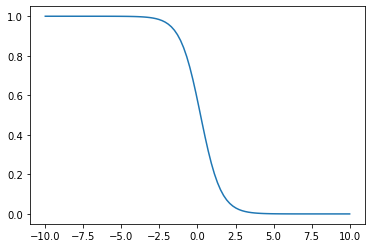

In [0]:
plt.plot(X, Y)
plt.show()

# 3D Plotting of sigmoid function for 2 dimensional data (2 features) and 1 dimensional target variable

$S_{w_1, w_2, b}(x_1, x_2) = \frac {1}{1 + e^{-{(w_1.x_1 + w_2.x_2 + b)}}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1 / (1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [0]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [0]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

In [0]:
X1 = np.linspace(-10, 10, 100) # vector
X2 = np.linspace(-10, 10, 100) # vector
# In order to plot for every combination of X1 and X2 we use meshgrid
# computing for joint grid which takes all possible pairs for plotting
# All possible means: each scalar value of XX1 or XX2 will have any value
# of range -10 to +10 with 100 points i.e., XX1[0] have 100 points upto 
# XX1[99] have 100 points and so we have 10000 points for XX1 creating all possible
# 2D points. Same goes with XX2 where meshgrid creates another 10000 2D points.
XX1, XX2 = np.meshgrid(X1, X2) 

print(X1.shape, X2.shape, XX1.shape, XX2.shape)
print(X1.ndim, X2.ndim, XX1.ndim, XX2.ndim)
#print(XX1[0])

(100,) (100,) (100, 100) (100, 100)
1 1 2 2


In [0]:
w1 = 2 #@param {type: "slider", min: -2, max: 2, step: 0.1}
w2 = -0.5 #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 3.3 #@param {type: "slider", min: -10, max: 10, step: 0.1}
Y = sigmoid_2d(XX1, XX2, w1, w2, b) # Python Broadcasting

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

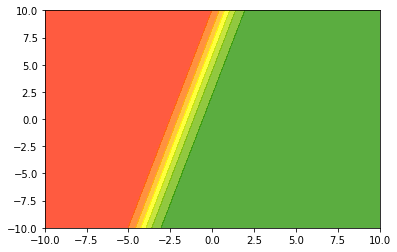

In [0]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.75)
plt.show()

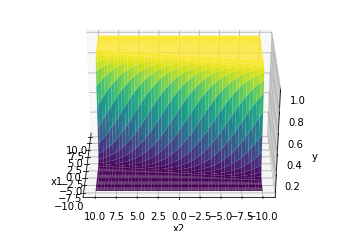

In [0]:
# This plot is between inputs and target
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(XX1, XX2, Y, 500, cmap='viridis')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
# first parameter in view_init denotes degree above X1-X2 plane and the
# second parameter denotes degree rotated counter-clockwise about Y axis
ax.view_init(30, 180) 

# Compute loss for a given dataset

In [0]:
# Let us try to find out the values of "w" and "b" in a brute force search algorithm way
# when X and Y are given to the mathematical function

# Initial we assume the values of w and b
w_unknown = 0.5
b_unknown = 0.25

# 1 dimensional feature
X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

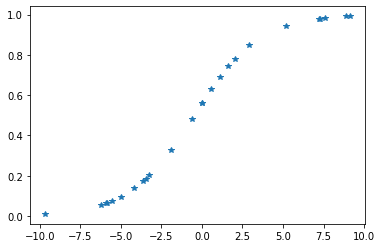

In [0]:
plt.plot(X, Y, '*') # scatter plot
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [0]:
# Weight hypothesis
# Bias hypothesis

#W = np.linspace(-1, 1, 100)
#W = np.linspace(0, 2, 100)
#B = np.linspace(-1, 1, 100)

#W = np.linspace(0, 2, 101)
#B = np.linspace(-1, 1, 101)

W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 102)

WW, BB = np.meshgrid(W, B)
Loss = np.zeros(WW.shape)
print(Loss)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
print(WW.shape)
print(BB.shape)
print(Loss.shape)

#print(WW[101,100])

(102, 101)
(102, 101)
(102, 101)


In [0]:
# Parameter space w and b where for each of the hypothesis in this parameter
# space we compute the loss
# WW and BB has same shape
# So we can use any of the one to loop over and get the loss at all points
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

[[4.6764455  4.3200227  3.97271387 ... 0.67170795 0.67456573 0.67741582]
 [4.63123744 4.27183574 3.92231734 ... 0.66615017 0.6690566  0.67195383]
 [4.58639609 4.2240442  3.87235041 ... 0.66065454 0.6636085  0.66655178]
 ...
 [4.54004148 4.17359006 3.8217385  ... 0.53969479 0.5427604  0.54577523]
 [4.58406323 4.22053069 3.8708826  ... 0.54274118 0.54577869 0.54876536]
 [4.62845904 4.26787643 3.92046681 ... 0.545847   0.54885638 0.55181487]]
0.5488563817007794


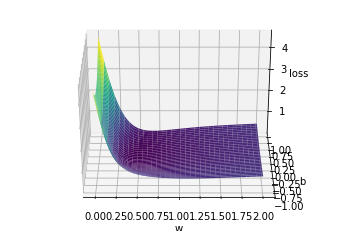

In [0]:
print(Loss)
#print(Loss[i, j])
print(Loss[101, 99]) # loss at row 102 and column 100
# This plot is between weight, bias and loss
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
# first parameter in view_init denotes degree above X1-X2 plane and the
# second parameter denotes degree rotated counter-clockwise about Y axis
ax.view_init(30, 270) 

In [0]:
# tells the co-ordinate of the number which is minimum in the list
# argmin returns the minimum element index by falttening the Loss which is in 2D 
# array to a 1D array
# Flattening of 2D to 1D leads to 102*101 = 10301 indices (10302 elements)
# i is row and j is column  
ij = np.argmin(Loss)

print(i)
print(j)
print(ij)
#print(Loss)
print(Loss.shape)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

101
100
6388
(102, 101)


In [0]:
print(i, j)

63 25


In [0]:
print(WW[i, j], BB[i, j])

0.5 0.24752475247524752


# Class for sigmoid neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self, x):
    # return np.dot(x, self.w.T) + self.b
    return np.dot(x, self.w) + self.b
  
  def sigmoid(self, x):
    return 1.0 / (1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):
    # initialize w and b
    if initialise:
      # self.w = np.random.randn(1, X.shape[1])
      self.w = np.random.randn(X.shape[1])
      self.b = 0
    
    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.75, True)

In [0]:
# def plot_sn(X, Y, sn): # plot
def plot_sn(X, Y, sn, ax):  # sub plot
  # Feature 1 grid
  X1 = np.linspace(-10, 10, 100)
  # Feature 2 grid
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  # Target
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val)) # need to understand this part  
      # print(YY[i, j])
  # To plot the contours
  # plt.contourf(XX1, XX2, YY, cmap = my_cmap, alpha = 0.6) # plot
  ax.contourf(XX1, XX2, YY, cmap = my_cmap, alpha = 0.6) # sub plot
  # To plot the points here
  # plt.scatter(X[:,0], X[:, 1], c = Y, cmap = my_cmap) # plot
  ax.scatter(X[:,0], X[:, 1], c = Y, cmap = my_cmap) # sub plot
  # plt.plot()
  ax.plot()

[-0.3015015   1.28018132] 0.0003988075857053744
[-0.06522804  1.2003375 ] 0.004811987495077209
[0.35510905 1.05130845] 0.015645773723572842
[0.76815674 0.86729792] 0.003665543688434263
[0.87134389 0.71246303] 0.012778812441310133
[0.94959325 0.4817611 ] 0.04616322391289422
[1.0241606  0.11122117] 0.09998023665406529
[ 1.02024152 -0.30410697] 0.07840248108037781
[ 1.06800643 -0.39660216] 0.006863259969999522
[ 1.15283447 -0.35543971] -0.05322046080619495
[ 1.19258061 -0.42289138] -0.1099876760492325
[ 1.25631607 -0.40352644] -0.15848358708545882
[ 1.2950451  -0.44104152] -0.20389930311568322
[ 1.34215217 -0.44210875] -0.24402852229242833
[ 1.37947315 -0.46058075] -0.28120798168720407
[ 1.41682648 -0.46989438] -0.31504595881130937
[ 1.45059609 -0.48152206] -0.34633197285477646
[ 1.48251315 -0.49149129] -0.375256044843701
[ 1.51240665 -0.50108094] -0.40214044548467165
[ 1.54058855 -0.51007469] -0.42721056945116237
[ 1.56722086 -0.51858153] -0.450668966211544
[ 1.59246039 -0.52664384] -0.4

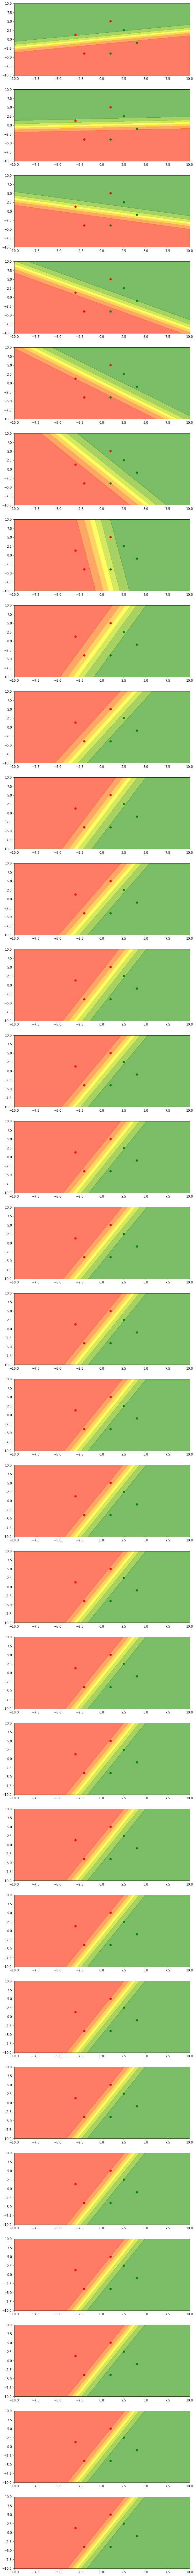

In [0]:
#print(sn.w, sn.b)
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  # i + 1 denotes starting from 1
  # ax is handler
  ax = plt.subplot(N, 1, i + 1) # plots are divided into rows and columns 
  # plot_sn(X, Y, sn)

  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

In [0]:
# ''' There’s no such rule to distinguish between to use of these two.
# Just to clarify, in sigmoid and perceptron, different datasets are used. 
# Due to which the shape of ‘Y’ is different in these.
# We’re using different shapes of W, just to match the ‘Y’ label shape in order 
# to match the shape of ‘Y_pred’ and ‘Y’.

# Please take a look at these points in the code, I hope you’ll get to understand 
# what I’m trying to say. '''
''' Try to do an animation video of the above plots '''    

' Try to do an animation video of the above plots '

# Real world application of Sigmoid Neuron

## Load Data

In [0]:
#!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

In [0]:
data = pd.read_csv("mobile_cleaned.csv")

In [0]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [0]:
data.shape # 341 data points and 87 features with 1 target feature

(341, 88)

In [0]:
X = data.drop("Rating", axis = 1)

In [0]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [0]:
Y = data["Rating"]

In [0]:
type(Y)

pandas.core.series.Series

In [0]:
Y.values # converting the series data as array for easier numerical computation

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
Y.head()
print(type(Y.values))

<class 'numpy.ndarray'>


In [0]:
''' Real valued Y is available and a binaized Y available
We train the model with Real valued Y because sigmoid neuron can capture the real
valued output but eventually compute accuracy on the binarized value of Y '''

threshold = 4.2
data["Class"] = data["Rating"] >= threshold

In [0]:
# This outputs boolean data
data["Class"]

0       True
1       True
2       True
3       True
4       True
       ...  
336    False
337    False
338    False
339    False
340     True
Name: Class, Length: 341, dtype: bool

In [0]:
# We will convert them into integer
data["Class"] = data["Class"].astype(np.int)

In [0]:
# Let us see the class counts to understand if the target variable is skewed or not
data["Class"].value_counts()
print(data["Class"].value_counts(normalize = True)) # prints in fraction

0    0.533724
1    0.466276
Name: Class, dtype: float64


In [0]:
# we adjusted the threshold value from 4 to 4.2 just to mkae the baseline 
# for model with balanced set of classes
Y_binarised = data["Class"].values # binarised output for threshold 4.2 

In [0]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### Standardisation

In [0]:
# When we have data set with features with large ranges of data within then for
# them to simultaneously contribute to a single model would become difficuilt as
# learning algorithm learns it in a very difficuilt manner (to give weightage). 
# To avoid this difficuilty we exploit the prpoerties of the dataset.

''' Property 1: Each column of dataset have zero mean(average number is zero). 
Property 2: Each column of dataset have standard deviation of 1.'''
# sklearn is used for machine learning for standardization
# StandardScaler

from sklearn.preprocessing import StandardScaler

In [0]:
R = np.random.random([100, 1])

In [0]:
R # 100 numbers between 0 and 1

array([[0.62758911],
       [0.49508002],
       [0.34035721],
       [0.41845641],
       [0.51264842],
       [0.128754  ],
       [0.79516316],
       [0.43054493],
       [0.45013081],
       [0.6950558 ],
       [0.54039152],
       [0.90016087],
       [0.86510755],
       [0.53367283],
       [0.30773188],
       [0.64951689],
       [0.72231269],
       [0.02262373],
       [0.84305822],
       [0.75037469],
       [0.96930155],
       [0.51986276],
       [0.38756006],
       [0.54489662],
       [0.78542722],
       [0.12855843],
       [0.67819319],
       [0.56210114],
       [0.53600071],
       [0.61628423],
       [0.87662639],
       [0.95673248],
       [0.91612314],
       [0.98107337],
       [0.49066797],
       [0.29168484],
       [0.97945361],
       [0.59968484],
       [0.29699032],
       [0.82694882],
       [0.74736171],
       [0.13963452],
       [0.91241496],
       [0.26008764],
       [0.68163508],
       [0.04336506],
       [0.15651242],
       [0.478

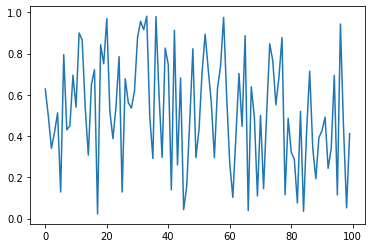

In [0]:
plt.plot(R)
plt.show()

In [0]:
print(type(R))
np.mean(R)

<class 'numpy.ndarray'>


0.5209805843555115

In [0]:
np.std(R)

0.2665254961165306

In [0]:
''' What we can see that np.mean(R) returns around 0.5 and np.std(R) returns
around 0.30. This means the column is not standardized column because a standardized
will have a mean of 0 and standard deviation of 1'''

# How to standardize the column?
scaler = StandardScaler() # creates an instance of StandardScaler

In [0]:
scaler.fit(R) # Fittng the column R

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
print(scaler.mean_)

[0.52098058]


In [0]:
R_t = scaler.transform(R) # transforming the column R to a standardized column

In [0]:
np.mean(R_t) # this is almost equal to 0

4.551914400963141e-16

In [0]:
np.std(R_t) # exactly 1

1.0

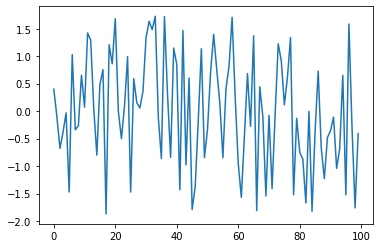

In [0]:
plt.plot(R_t)
plt.show()

In [0]:
# random state ensures reproducibility of split
# stratify will divide the data based on the classes of the output 
# (we have real numbers as target and we cannot stratify it therefore
# we will use Y_binarised to stratify which is the binarised version of target 
# feature. This will ensure that the number of 1's and 0's are roughly the same 
# in X_train and X_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.values, 
                                                    random_state = 0, 
                                                    stratify = Y_binarised) 

In [0]:
''' We can standardize, normalize, clean, drop or whatever processing that needs
to be done only in training data. We do not have any access to test data '''
print(X_train.shape)
print(X_test.shape)

(255, 87)
(86, 87)


In [0]:
scaler = StandardScaler()

## Standardization of X_train and X_test data 
## $Standardized_x = {({1}/{std})*{x} + {(- {mu}/ {std})})} $

In [0]:
# Standardization
# learning parameters are mean denoted as mu and standard deviation denoted as std
# transformation is in the form written as y = mx + c where m = 1/std and c = -mu/std

# Fitting and Transforming on one go
X_scaled_train = scaler.fit_transform(X_train) # learning of parameters and transformation of data
X_scaled_test = scaler.transform(X_test) # no learning but directly the learned parameters are applied for transformation

In [0]:
print(X_scaled_train.shape)
print(X_scaled_test.shape)

(255, 87)
(86, 87)


In [0]:
#X_scaled_train

## $ Normalized_x = {(1/ max - min)}  * x  + {(-( min / max - min))} $

In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
type(Y_train)

numpy.ndarray

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1)) # (-1, 1) to reshape as we have single feature

In [0]:
print(np.max(Y_scaled_train))
print(np.min(Y_scaled_train))

1.0
0.0


In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [0]:
Y_scaled_train

array([[0.68],
       [0.72],
       [0.72],
       [0.6 ],
       [0.8 ],
       [0.64],
       [0.68],
       [0.72],
       [0.64],
       [0.76],
       [0.72],
       [0.2 ],
       [0.8 ],
       [0.72],
       [0.92],
       [0.76],
       [0.6 ],
       [0.76],
       [0.84],
       [0.68],
       [0.8 ],
       [0.72],
       [0.32],
       [0.72],
       [0.36],
       [0.76],
       [0.72],
       [0.64],
       [0.72],
       [0.76],
       [0.6 ],
       [0.8 ],
       [0.24],
       [0.4 ],
       [0.68],
       [0.44],
       [0.64],
       [0.52],
       [0.68],
       [0.6 ],
       [0.6 ],
       [0.56],
       [0.64],
       [0.56],
       [0.72],
       [0.48],
       [0.68],
       [0.64],
       [0.72],
       [0.64],
       [0.72],
       [0.76],
       [0.68],
       [0.52],
       [0.6 ],
       [0.68],
       [0.76],
       [0.72],
       [0.76],
       [0.52],
       [0.56],
       [0.76],
       [0.56],
       [0.56],
       [0.68],
       [0.56],
       [0.

In [0]:
# Now the treshold value also changes after standardization
# threshold is a scalar value and so we convert it to a list and then to an array
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [0]:
scaled_threshold

0.6800000000000002

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [0]:
#Y_binarised_train
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

In [0]:
print(Y_binarised_train)
print()
print(Y_binarised_test)

[0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1]

[0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0]


# Train on Real Data

In [0]:
sn = SigmoidNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


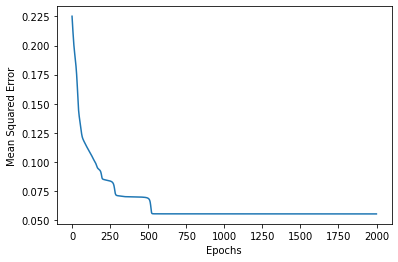

In [0]:
sn.fit(X_scaled_train, Y_scaled_train, epochs = 2000, learning_rate = 0.015, display_loss = True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [0]:
print(accuracy_train, accuracy_test)

0.7529411764705882 0.7209302325581395
